In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [9]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 1
Accuracy: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.002):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  #print(Z)
  plt.contourf(xx1, xx2, Z, alpha=0.3)
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


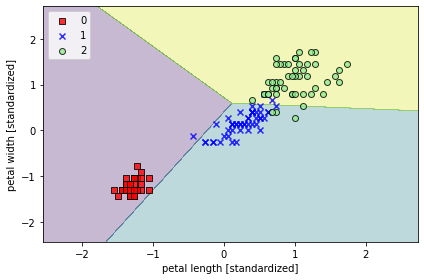

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Modeling class probabilities via logistic regression

Text(0, 0.5, '$\\phi (z)$')

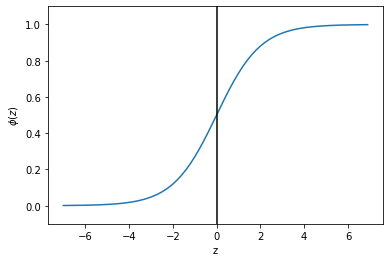

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')



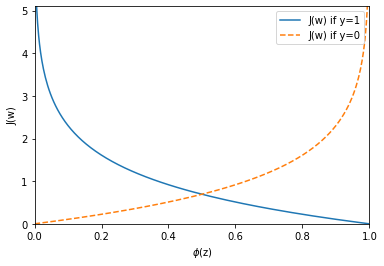

In [13]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend()
plt.show()

In [14]:
class LogisticRegressionGD(object):
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
      self.cost_.append(cost)
    return self



  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  def predict(self, X):
     return np.where(self.net_input(X) >= 0.0, 1, 0)


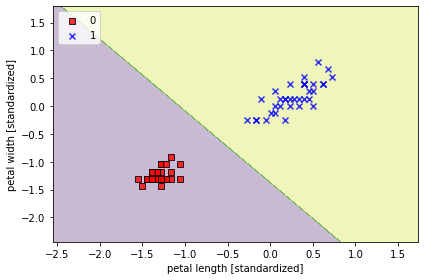

In [15]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
# take only 2 kinds of flower

y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Training a logistic regression model with scikit-learn

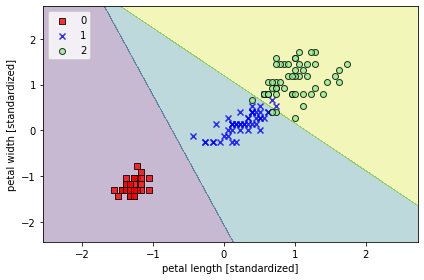

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Tackling overfitting via regularization

[[-4.55084948e-04 -4.37679584e-04]
 [ 9.45923160e-05  5.76506032e-05]
 [ 3.60492645e-04  3.80028991e-04]]
[[-0.00453251 -0.00435848]
 [ 0.00094278  0.0005734 ]
 [ 0.00358974  0.00378509]]
[[-0.04356729 -0.04182987]
 [ 0.00912565  0.00543828]
 [ 0.0344498   0.0364006 ]]
[[-0.31724175 -0.30082635]
 [ 0.07064185  0.03399467]
 [ 0.24901845  0.26779114]]
[[-1.09635171 -0.9995533 ]
 [ 0.30947422 -0.03124033]
 [ 0.86772813  0.99238849]]
[[-2.30900033 -2.03490074]
 [ 1.15687091 -0.81959988]
 [ 2.3156396   2.46398282]]
[[-3.90004568 -3.37718556]
 [ 2.15931013 -1.82053519]
 [ 5.57631599  4.27609563]]
[[-5.83037767 -4.98273149]
 [ 2.4099601  -2.07349026]
 [10.58756396  5.80486652]]
[[-8.05616815 -6.81044764]
 [ 2.43940519 -2.10326245]
 [13.93110597  6.62393848]]
[[-10.85522339  -8.47746807]
 [  2.4424029   -2.10629411]
 [ 14.65216005   6.7948242 ]]


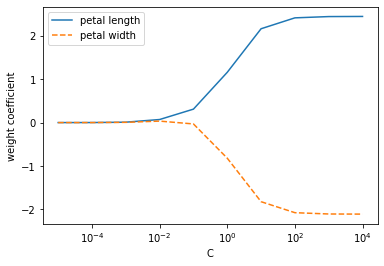

In [27]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
  lr.fit(X_train_std, y_train)
  params.append(10.**c)
  weights.append(lr.coef_[1])
  print(lr.coef_)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()